# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website (seconds)
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn. tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score

from sklearn import tree

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To ignore warnings

import warnings

warnings. filterwarnings ("ignore")

## Data Overview

- Observations
- Sanity checks

In [1]:
from google.colab import drive

drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [ ]:
df = pd.read_csv ("ExtraaLearn.csv")

df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

#### Observations:


• There are **4612 observations and 15 columns** in the dataset.

• All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

In [ ]:
#To check the unique value counts in order to separate categorical data from continuous data.

df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


#### Observations:


• **ID is an identifier** which is unique for each lead and we can drop this column as it would not add any value to our analysis.

• On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the column mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [ ]:
# Dropping the column

df = df.drop (["ID"] , axis = 1)

In [ ]:
# Creating numerical columns

num_cols = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]

# Creating categorical variables

cat_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity", "print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral",
           "status",]

## EDA

- It is a good idea to explore the data once again after manipulating it.

### **Univariate analysis of numerical columns**

In [ ]:
# Checking summary statistics

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


#### Observations:

**Average lead age is around 46 years**. It has a high range, from 18 years to 63, indicating good age diversity in the lead pool.


**The average website visits is around 3.5.** But there are some extreme values given that the max is 30. In terms of engagement 3.5 website visits is alright, it could maybe be improved with some overhaul to the ads that lead to the website. However this discrepancy is going to help identify which leads are more likely to convert to paid customers.


**The average time spent on a website is 724 seconds.** At least 50% of leads spend 376 seconds. In terms of attention retention is fine, but could maybe be improved with an overhaul to the website. It has a high range of values from 0-2537 seconds, which again, is going to help identify which leads are more likely to convert to paid customers.


**The average page views per visit is around 3.** The same phenomenon happens here, 3 pages views per visit isn't that bad, maybe it can be improved. Once again, there's a big descrepancy in values from 0-18 and it is going to help identify which leads are more likely to convert to paid customers.

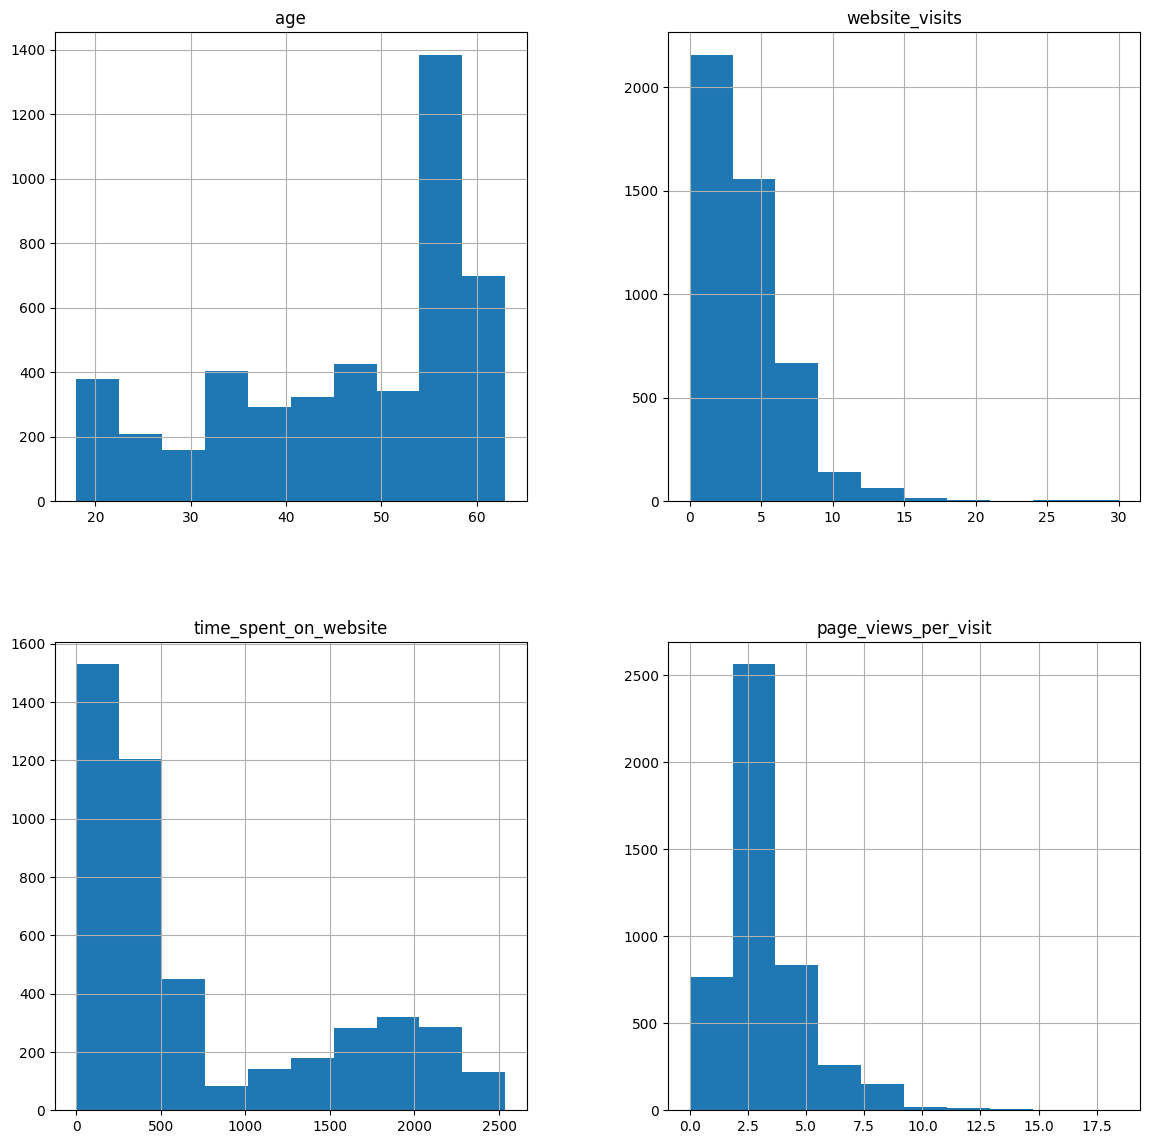

In [ ]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

#### Observations:

**The age is skewed to the right.** This can be solved by increasing advertising on social media platforms used by younger people like Instagram, X, YouTube or TikTok, and by creating partnerships with universities.


**Website visits are left skewed.** It doesn't seem that bad, but it might be improved with
some changes to the advertising.


**Time spent on website is a bit bimodal.** It is still left skewed, but it has a dip in the middle and and increase afterwards. It doesn't seem healthy and could use with a website overhaul to increase retention and get the distributuion a bit more normalized.


**Page views per visit is left skewed**. Three pages doesn't seem that unhealthy, it depends on the page layout and how much information there is per page. Maybe it can be improved.

### **Univariate analysis for categorical variables**

In [ ]:
# Printing the % sub categories of each category with normalize = True to show the %
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

#### Observations:

- **Around 56% of leads are working,** and **around 31% are unemployed**, which confirms the upskill and reskill objective of the program.


- **The majority of people prefer the website with 55%.** Which might be a reflection of the average age of the leads.


- The vast majority of people complete a good portion of their profile with **49% high and around 48% medium.**, which seems healthy.


- **E-mail** is the prefered comunication channel with **around 49%.**


- **My theory on poor advertisment was correct,** with **89% of leads not seeing newspaper advertisment** and **94% the magazines**. Which isn't surprising given their decrease in popularity.


- **However, and most worryingly, **84% of leads didn't see the digital media ads.** Which is absolutly appaling.


- First of all, there shouldn't even be print media advertisment regarding the offer of **programs on cutting-edge technologies** to students and professionals to help them upskill/reskill. All advertising resources should be focused on digital media.

        
- Then, either something is wrong with the advertisment or with the digital platforms used. An overhaul to the actual ads might be necessary. Also, like I previously stated, platforms like Instagram, X, YouTube and TikTok should be priorityzed.


- **The educational channels also seem low with 84% of leads not seeing anything about the program on them.** There could be and increase of discussion on these channels. However, I think there should be an actual partnership with universities, instead of just discussion forums and educational websites.


- **The referral rate is terrible with 97% of leads not hearing about the program through referral.** There should be an actual referral program with a substantial monetary compensation for a converted referral.


- **The conversion rate is pretty bad with 70% of leads NOT converting**. Hopefully we might be able to change that after the model. However, the bigger story here might just be the problems metioned in both observation sections. There seems to be a structural problem in the way the program is being brought to market and advertised. As such, there will probably only be so much we can do to change the conversion rate with just the model on its own.

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how status is related with other categorical variables.

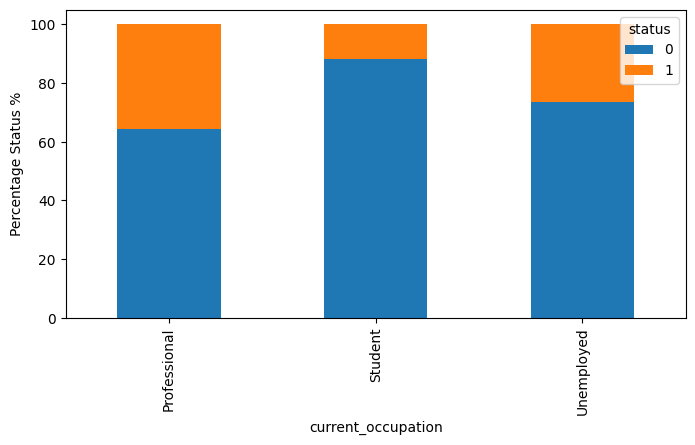

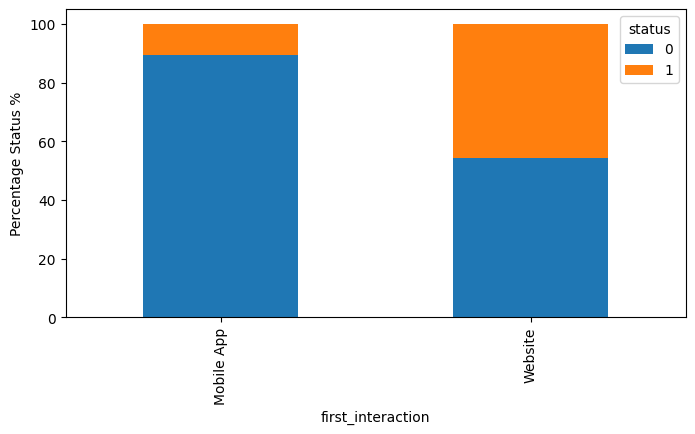

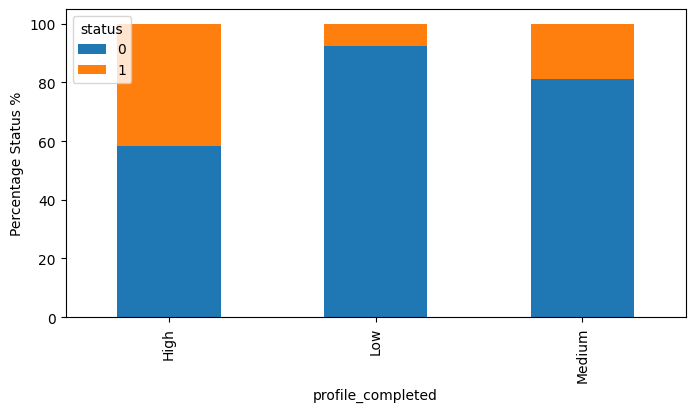

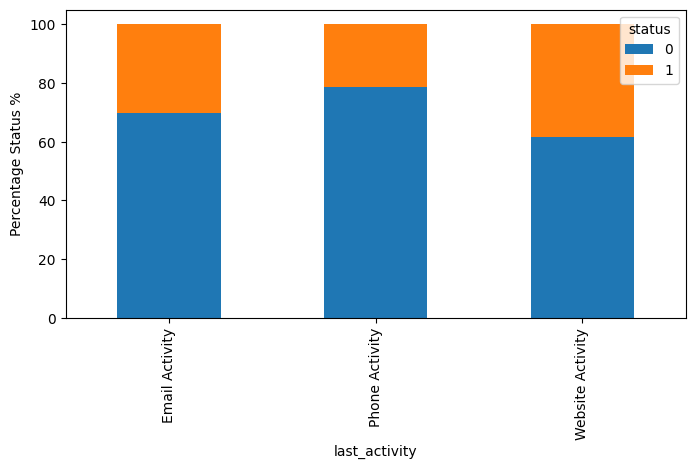

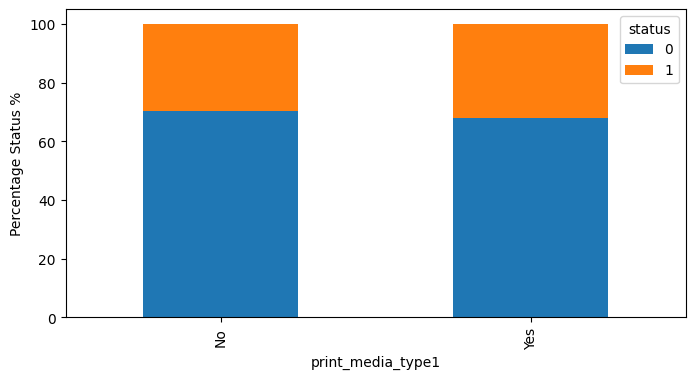

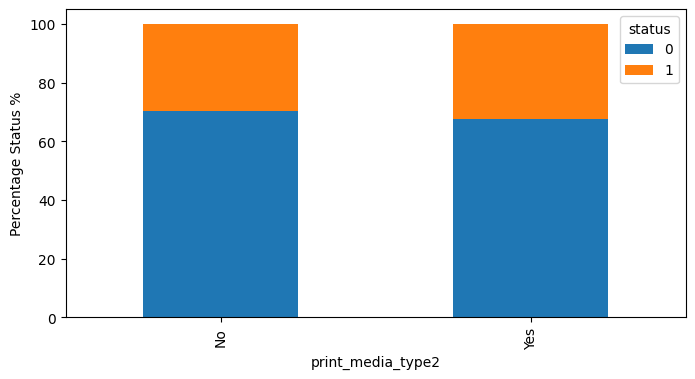

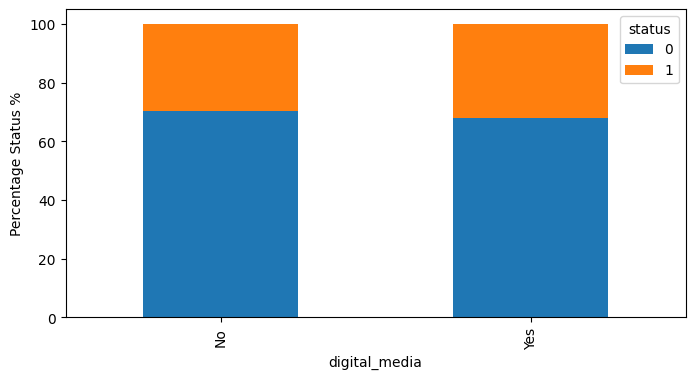

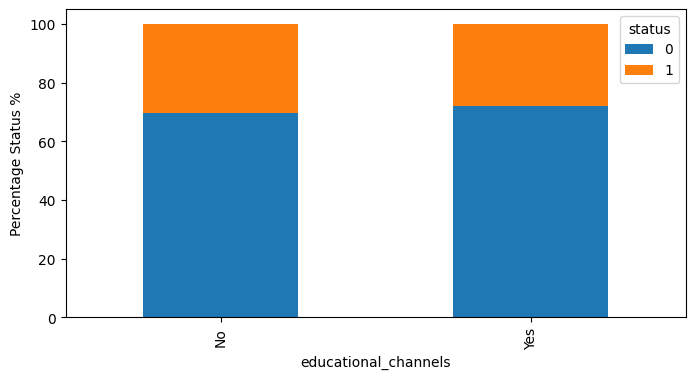

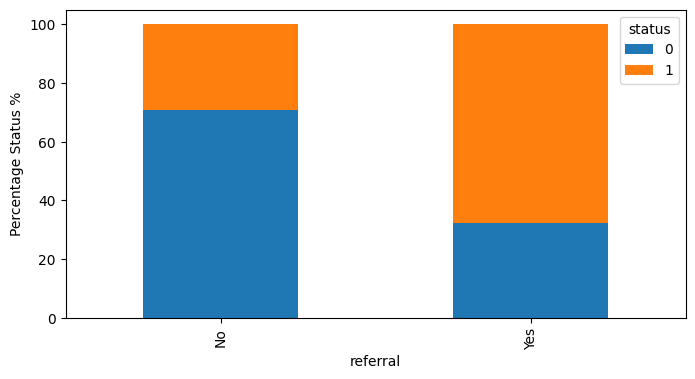

In [ ]:
"""We did a loop with a crosstab between every feature and
"status" displayed in a bar plot to show the percentages of lead conversion per feature.

if i != "status": Ensures that the target variable (status)
is not considered as one of the categorical variables.

df["status"] selects the status column as the target variable of the crosstab
and the stacked bar plot.

normalize = "index" converts the values into percentages, then we multiply by 100
to convert the decimal percentages into actual percentages.

stacked = True shows the status column (the target varible) in stacked bars over the
other columns' bars."""

for i in cat_cols:
    if i!="status":
        (pd.crosstab(df[i], df["status"], normalize = "index") * 100).plot(kind = "bar", figsize = (8,4), stacked = True)
        plt.ylabel("Percentage Status %")

#### Observations:

**About 35% of professional leads convert** in comparison to **about 23% unemployed** and **about 10% student.** As such, the current occupation seems to play a key role in getting them to participate in the program. This could be a reflection of the lead average age, but also of the program's price.


**About 45% of website first impressions convert** in comparison with **about 10% on the mobile app.** So,the first channels of interaction have an impact on the lead status. It might be another reflection of the lead average age, but it could also be a reflection of the state of the app.


**Website activity seems to be the best way to interact with leads, with about 37% conversion,** in comparison to **email activity with about 30% conversion** and **phone activity with about 20%.**


The company gets leads from various channels such as print media, digital media, referrals, etc. **The channel with the highest lead conversion rate is referrals, with about 70%.** Which is impressive and gives strength to my recomendation of creating a proper referral program.


On the other hand, it also confirms my theory that there's something wrong with the digital media advertising, given that conversion rate is almost the same between leads who saw and who didn't see the ads.  


**Having more details about a prospect does indeed increase the chances of conversion, with about 40% conversion rate for high profile completed,** in comparison to **low with about 10%** and **medium with about 20%.**

**Let's check the relationship between status and numerical variables**

In [ ]:
# Mean of numerical variables grouped by status

df.groupby(["status"])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


#### Observations:

**Age has a slightly higher mean in converted leads with around 48 years** in comparison to **non converted leads with around 45.** This might just be a coincidence or it could be because of the programs price.

**Time spent on website is way higher on converted leads with 1068 seconds** in comparison to **577 on non converted leads.** Which makes scense, the more time you spende on the website the more likely you are to convert into a paid costumer.

### **Let's check the relationship between different numerical variables**

<Axes: >

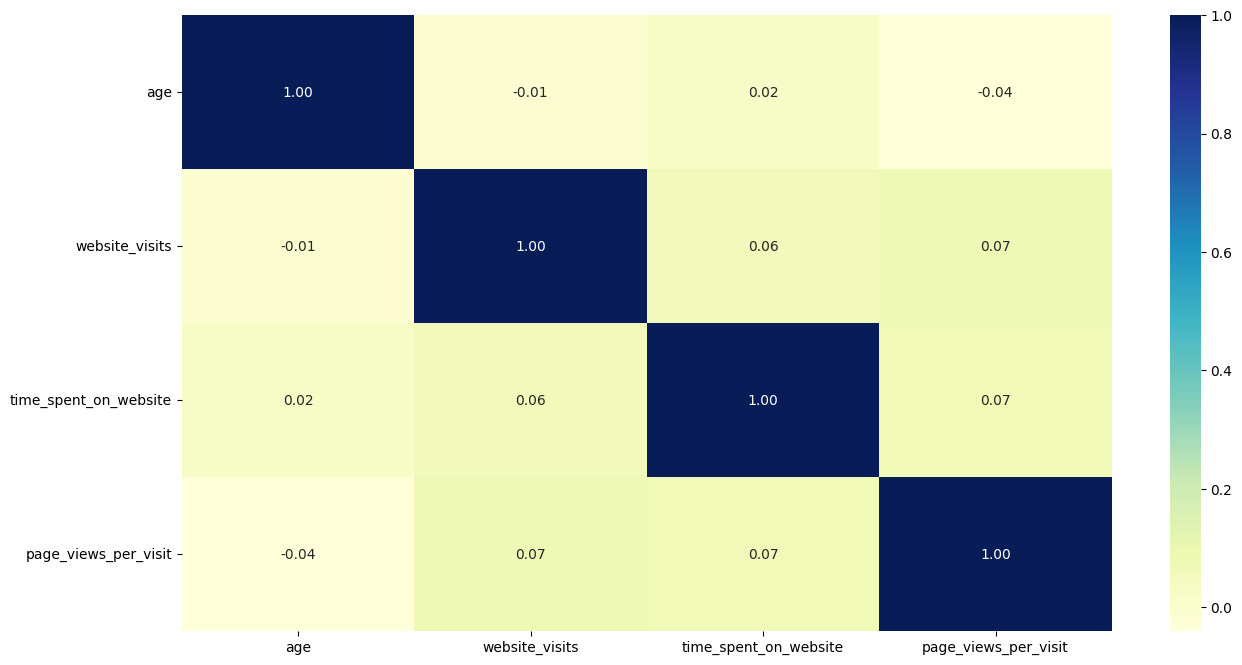

In [ ]:
# We plot the correlation between numerical variables

"""We use the .corr() method to pass the correlation between the numerical values,
    the annot=True to annotate the values, the fmt=0.2f to display the annotations
    with 2 decimal places and the cmap=YlGnBu to choose the color pallet."""

plt.figure(figsize=(15,8))

sns.heatmap(df[num_cols].corr(),annot=True, fmt="0.2f", cmap="YlGnBu")

#### Observations:

There are no high correlations between the numerical values, only a very small correlation between **time spent on website, page views per visit and website visits.**

## Building a Decision Tree model

In [ ]:
# Creating list of dummy columns

to_get_dummies_for = ["current_occupation", "first_interaction", "profile_completed", "last_activity"]

"""Creating dummy variables using drop_first = True to drop the first level
of each categorical variable to avoid multicollinearity issues."""

df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapping print media types, digital media, educational channels and referral

dict_print_media_type1 = {"Yes": 1, "No":0}
dict_print_media_type2 = {"Yes": 1, "No": 0}
dict_digital_media = {"Yes": 1, "No": 0}
dict_educational_channels = {"Yes": 1, "No": 0}
dict_referral = {"Yes": 1, "No": 0}


df["print_media_type1"] = df.print_media_type1.map(dict_print_media_type1)
df["print_media_type2"] = df.print_media_type2.map(dict_print_media_type2)
df["digital_media"] = df.digital_media.map(dict_digital_media)
df["educational_channels"] = df.educational_channels.map(dict_educational_channels)
df["referral"] = df.referral.map(dict_referral)

In [ ]:
# Separating target variable and other variables

Y= df.status
X= df.drop(columns = ["status"])

**We split the data into 70% train and 30% test set**

Then, we use **stratified sampling** due to the huge disparity between **converting leads (only 30%) and non converting leads (70%)**. This technique adequatly represents each subgroup by keeping their class frequencies during the training and testing, thus reducing bias.

In [ ]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
"""We create a metric function to easily iterate a heatmap of the confusion matrix
each time we test and train."""

"""The classification_report function from scikit-learn to displays precision,
recall, F1-score, and support for each class in the classification."""

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    #The confusion_matrix function from skit-learn calculates the confusion matrix.

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    """Then we dysplay the confusion matrix with sns.heatmap with annot=True to show the
    values, fmt=.2f to display the values with 2 decimal points and xticklabels
    to show the labels."""

    sns.heatmap(cm, annot=True,  fmt=".2f", xticklabels=["Non Convert", "Convert"], yticklabels=["Non Convert", "Convert"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

* The frequency of class A is 30% and the frequency of class B is 70%, as such, class B will become the dominant class and **the decision tree will become biased toward the dominant class.**


* We will use **class_weight as a hyperparameter** for the decision tree classifier. If we use a dictionary {0:0.30, 1:0.70} in the model, to specify the weight of each class (thus fliping the weights), the decision tree will give more weightage to class 1.

In [ ]:
# Building decision tree model

dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [ ]:
# Fitting decision tree model

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



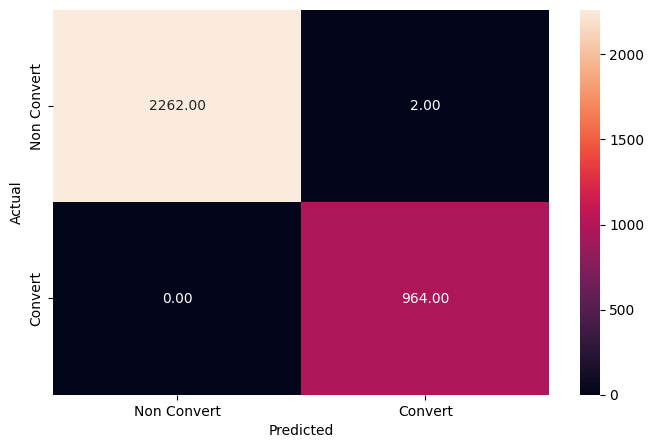

In [ ]:
# Checking performance on the training dataset

#We use dt.predict to generate predictions using the features of x_train

y_train_pred_dt = dt.predict(X_train)

"""Then, we apply the metrics_score function to display the results of the decision tree
on the y_train (actual) and the y_train_pred_dt (predicted)"""

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384



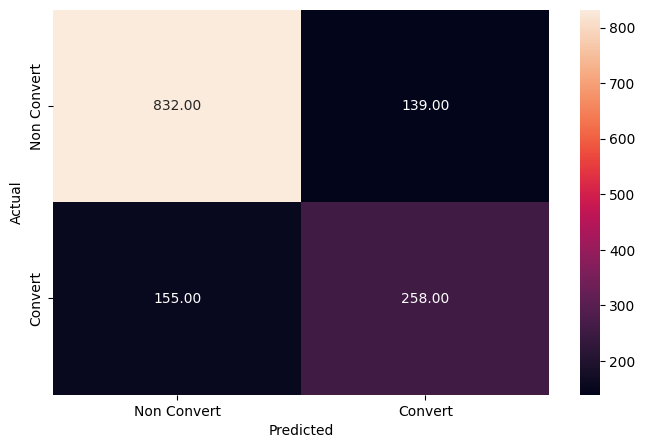

In [ ]:
# Checking performance on the test dataset

y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**


- The Decision Tree is overfitting on the training data but **there's a steep decline on the test data** as the recall is 0.62 in comparison to 1 for the training dataset.


- The precision on the test data suggests that there's a 35% (1 - 0.65) chance that the model will predict that a person is going to convert even though they would not, and **the program team may waste their time and energy on these leads who will not convert into paying customers.**

**We will plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

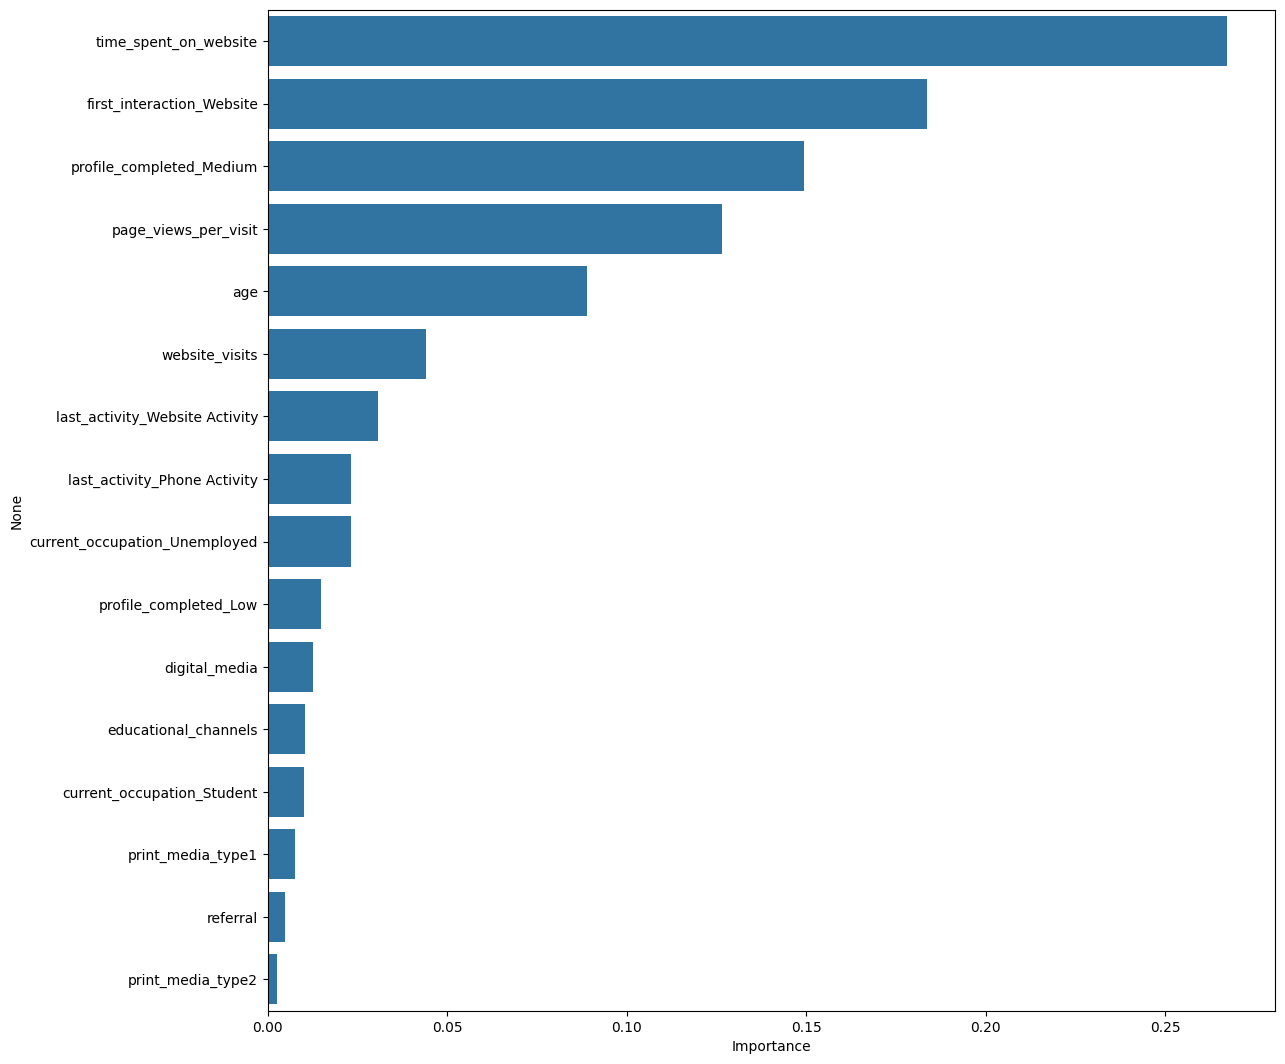

In [ ]:
# Plot the feature importance with the dt.feature_importances method

importances = dt.feature_importances_

# The columns method will get the columns index of

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**


- According to the Decision Tree, **time spent on website is the most important feature, followed by website as the first interaction, the medium profile completed, page views per visit and age.**


- Time spent on website makes sense, website as the first interaction surprises me for being so high in importance, but it might just be a reflection of the mean age or of the state of the app.


- The medium profile completed doesn't seem right, because high profile completed had the biggest ammount of converted leads. Page views per visit makes sense and age might be related to the program's price.  

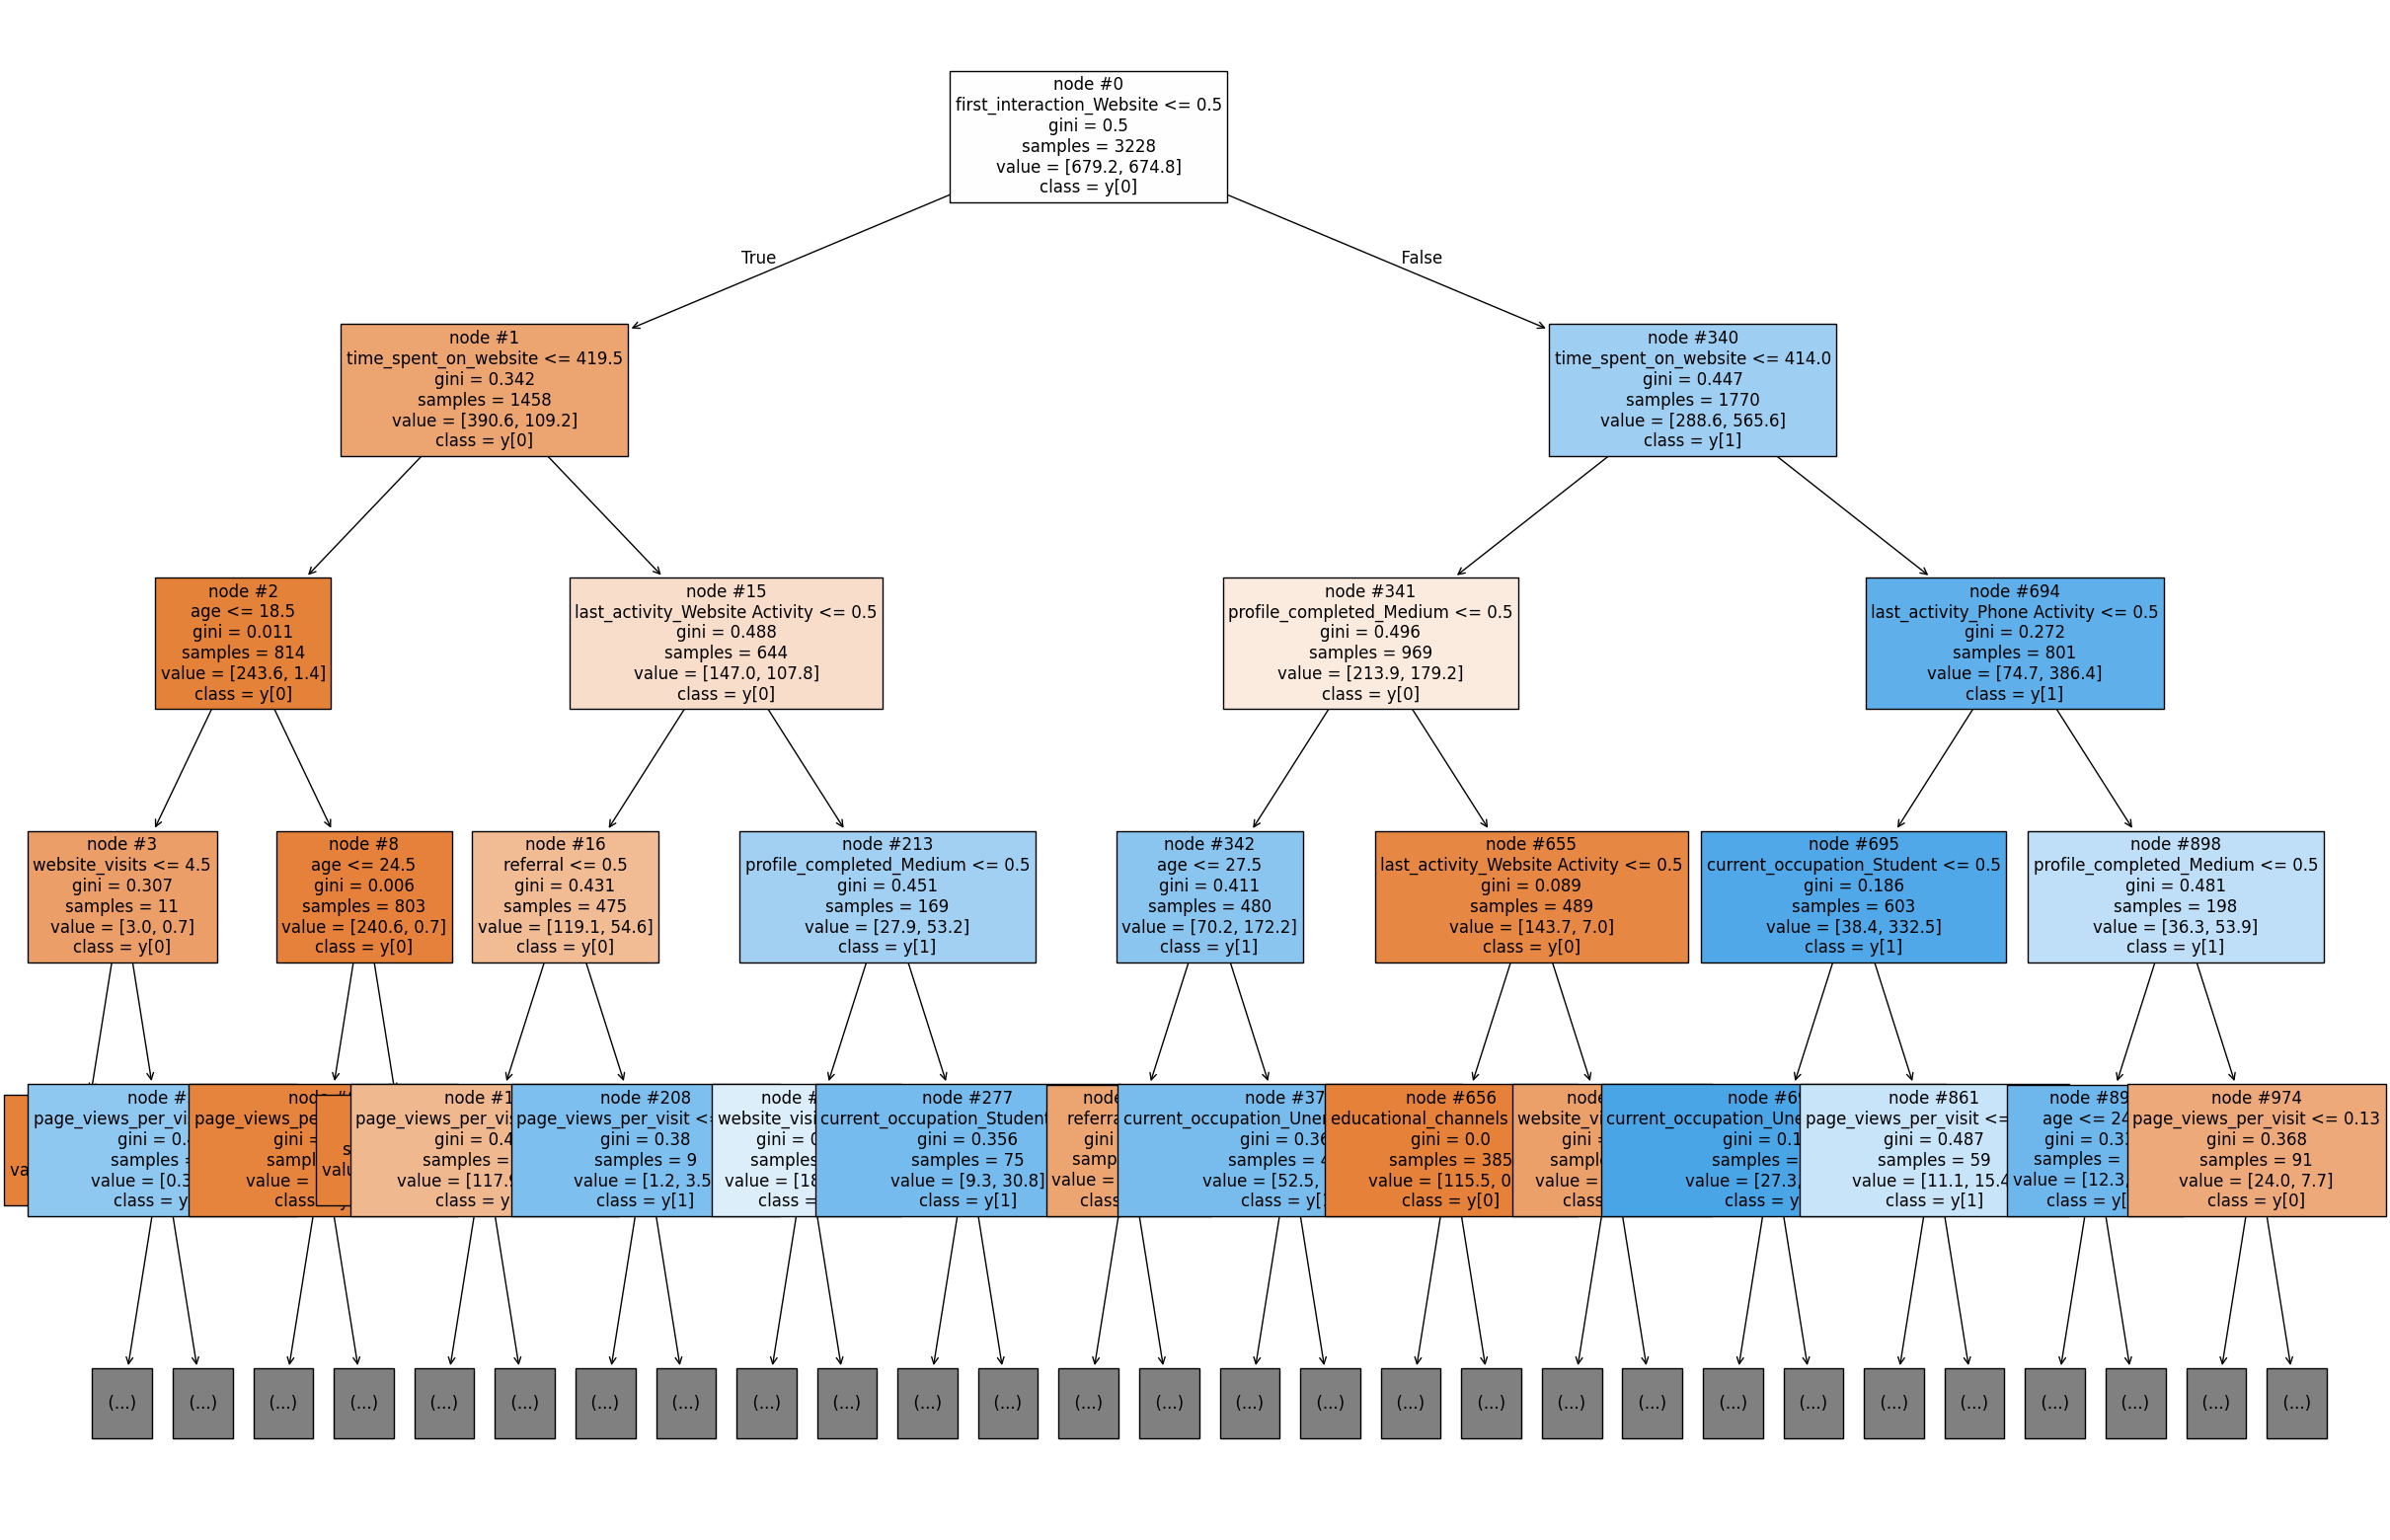

In [ ]:
#We plot the tree to visualise the results

features = list(X.columns)

plt.figure(figsize = (30, 20))

"""We use the he plot_tree function from the tree module in scikit-learn
to visualize the Decision Tree.

Then we set the max depth to 4 to help visualization.

We set filled=True to color the decision tree nodes to indicate the majority class.

Then we set node_ids=True to display the ID of each node in the tree and
class_names=True to display the class names."""

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

We have already done some prunning with the max depth, but given the poor result of the decision tree we have to do some more with gridsearchCV.

In [ ]:
# We choose the type of classifier with the previous established weights

dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

"""We use a range from 2 to 6 to choose the max depth.

Then we give gini (focuses on the most probable class, doesn't use log)
or entropy (it considers the overall distribution of class probabilities,
measures information gain, uses log.) to choose from for the criterion.

Finally a set of numbers [5, 10, 20, 25] to choose from
for the minimal number of samples required to be in a leaf node."""

parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

"""We choose the type of scoring used to compare parameter combinations
by passing the make_scorer method on the metrics function, both from skit-learn.

We use recall_score as the scoring metric, in order to find hyperparameters
that maximize the recall, particularly for class label 1.
(As we're interested in indentifying leads that will convert into paying customers)"""

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# We run the grid search seting 10 folds for the cross-validation process

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# We fit the grid search on the train data

gridCV = gridCV.fit(X_train, y_train)

"""We set the classifier to the best combination of parameters
using the .best_estimator_ method """

dtree_estimator = gridCV.best_estimator_

# Finally we fit the best estimator to the data

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=np.int64(3),
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



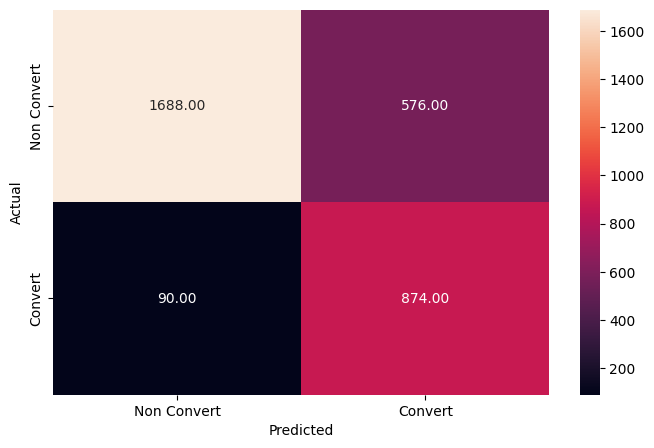

In [ ]:
# We check the performance on the training dataset

y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly in terms of precision.** The recall decreased a bit, but it is still high, it might still be overfitting.

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



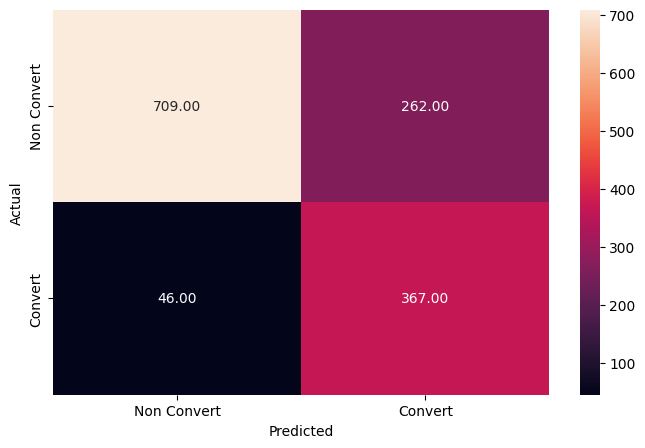

In [ ]:
# We check the performance on the test dataset

y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**


- The tuned model is performing better than the model with default values of hyperparameters.


- Given that the result is almost the same on the test and train datasets, albeit a high recall value, it might not actually be overfitting.


- Precision has gone down slightly from .65 to .58 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the lead is going to convert even if they won't, and this will cost time and effort to the program team.


**Let's look at the feature importance of this model and try to analyze why this is happening.**

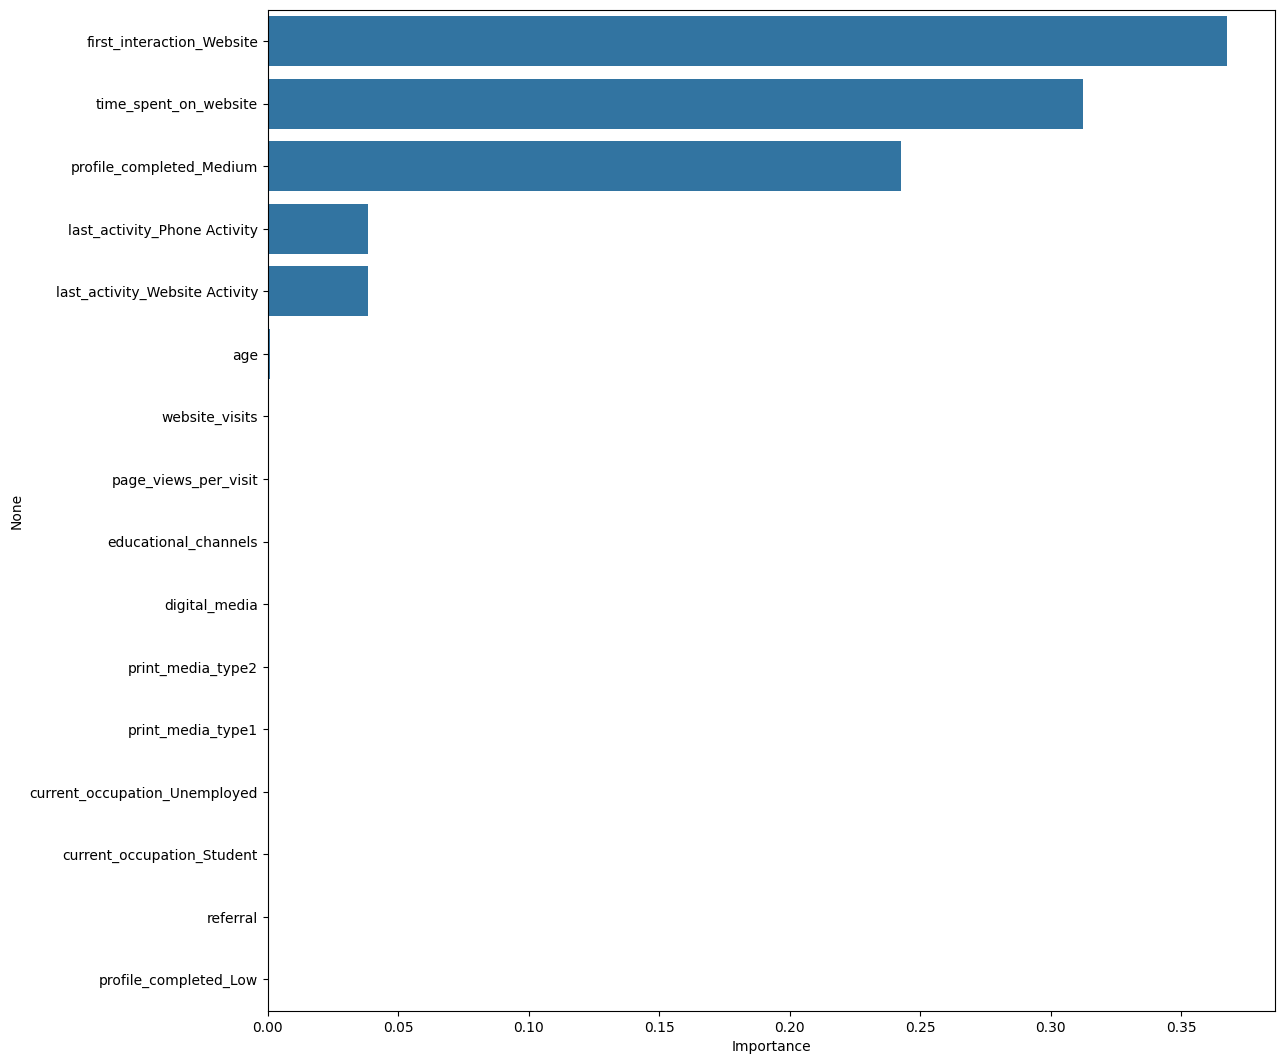

In [ ]:
importances = dtree_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

**Observations:**

- After tuning the model, we found out that only 5 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.


- According to this model too, `first_interaction_website`, `time_spent_on_website`, and `profile_completed_medium` are the 3 most important features that tell if a lead will convert into a paying customer.


- Time spent on website makes sense, website as the first interaction surprises me for being so high in importance, but it might just be a reflection of the mean age or of the state of the app.


- The medium profile completed doesn't seem right, because high profile completed had the biggest ammount of converted leads. It seems like it just got lost somewhere with the last activities as phone activity has the least conversion rate out of all the options for last activity. It doesn't make much sense to be more important than email which had a higher conversion rate.

## Building a Random Forest model

In [ ]:
# We fit the Random Forest classifier on the training data

rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



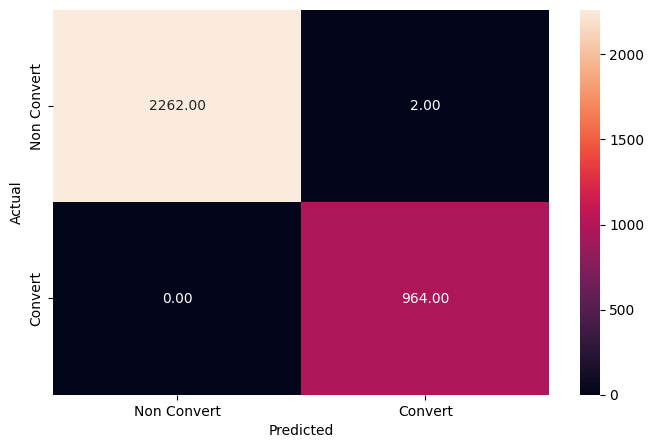

In [ ]:
# We check the performance on the training data

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



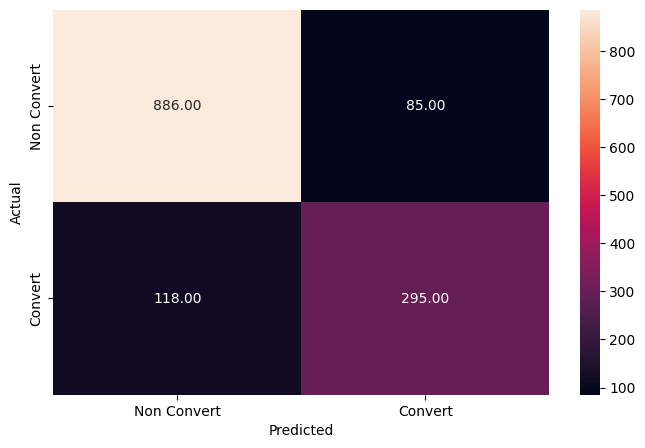

In [ ]:
# We checking the performance on the testing data

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only 0.72 for class 1.

- Precision dropped from 1 to 0.78 on the test data.

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance', ylabel='None'>

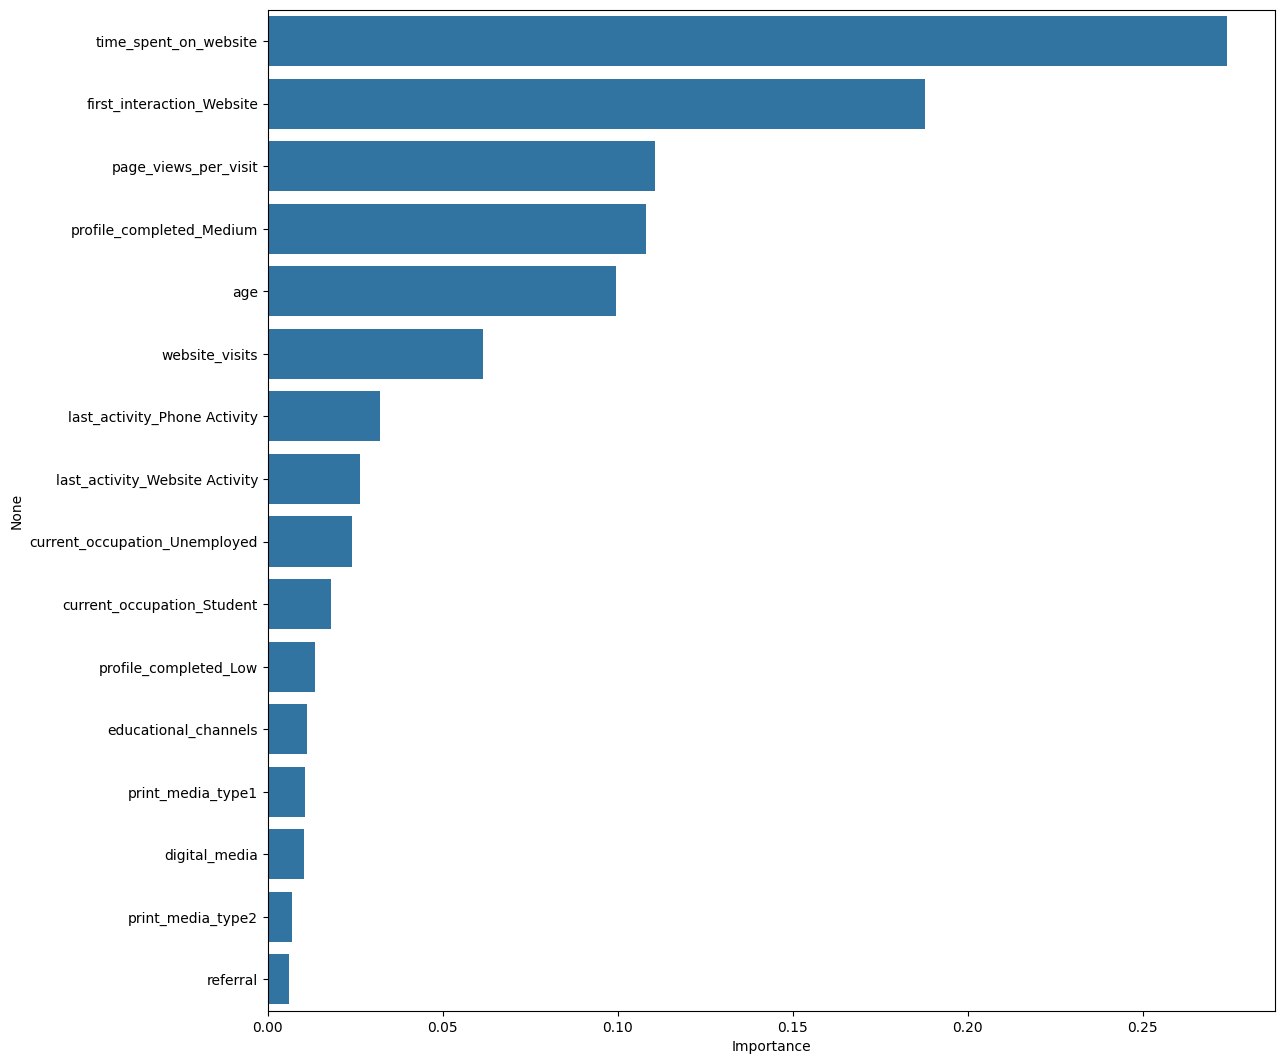

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**


- According to the Random Forest, **time spent on website is still the most important feature, followed again by website as the first interaction.** However, **the medium profile completed** and **page views per visit and age switch places.** They are know almost with the same importance levels and very close to **age** importance levels, which comes right after once again.


- Time spent on website makes sense, website as the first interaction surprises me for being so high in importance, but it might just be a reflection of the mean age or of the state of the app.


- The medium profile completed doesn't seem right, because high profile completed had the biggest ammount of converted leads. Page views per visit makes sense and age might be related to the program's price.


- Then we have the last activities again, but phone has a higher importance, just like in the tuned decision tree model and it continues to not make much sense for the same reasons as before. (It seems like it just got lost somewhere with the last activities as phone activity has the least conversion rate out of all the options for last activity. It doesn't make much sense to be more important than email which had a higher conversion rate.)


- Current occupation being unemployed still has some importance, which might make sense as if you are unemployed you might want to reskill or upskill to have better odds of finding a job.

## Do we need to prune the tree?

In [ ]:
# We choose the type of classifier

rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

"""We set the grid of parameters to choose from with the n_estimators
(which determines the number of trees in the Random Forest.)
 sorting values from a list [100, 250, 500].

 The "min_samples_leaf", which sets the minimum number of samples at each leaf,
 is chosing a number from a range using the "np.arange" function.
 In this case a range of 1 to 3 with a one step increment, so it will chose between 1,2 or 3

 The max_features (which determines the maximum number of features
 to consider when looking for the best split.) have different values to choose from.

 0.7 which considers 70% of the features for splitting at each node.

 0.9 which considers 90% of the features for splitting at each node.

"auto" which considers the square root of the total number of features
for splitting at each node."""

params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, "auto"],
}


"""We set the type of scoring used to compare parameter combinations
with the recall score for class 1"""

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# We run the grid search setting 5 folds for the cross-validation process

grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# We set the classifier to the best combination of parameters

rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# We fit the best estimator to the data

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       min_samples_leaf=np.int64(3), n_estimators=500,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2264
           1       0.88      0.97      0.92       964

    accuracy                           0.95      3228
   macro avg       0.94      0.96      0.94      3228
weighted avg       0.96      0.95      0.95      3228



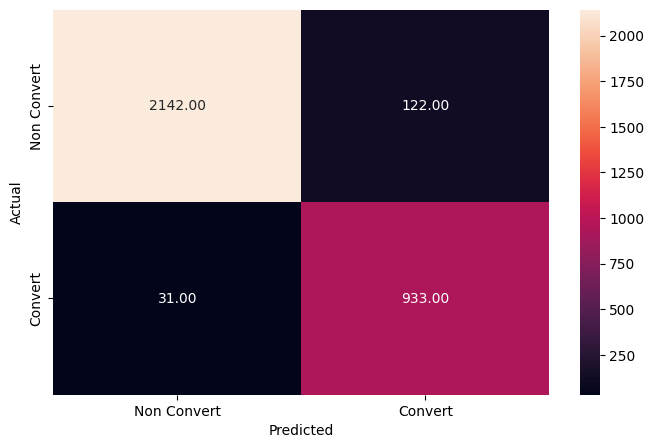

In [ ]:
# We check the performance on the training data

y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       971
           1       0.74      0.78      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.85      1384



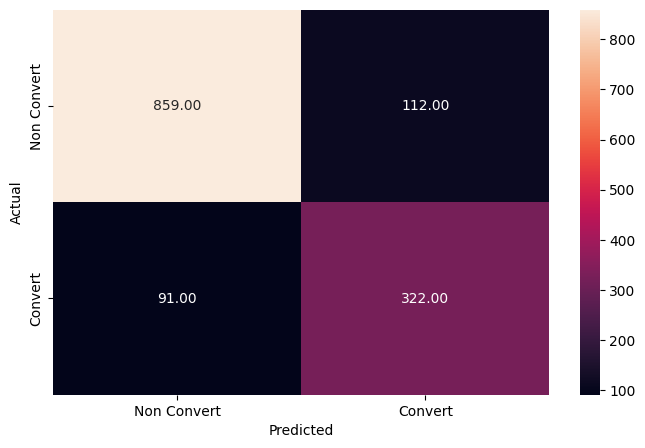

In [ ]:
# We check the performance on the test data

y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The tuned model is not overfitting the training dataset, but **it shows an aceptable performance on the test dataset.**

- **The recall for class 1 has improved with a small decrease in precision**.

- **This model is the best-performing one among all the models so far,** and is giving us a good trade-off between precision, recall and f1 scores on the test dataset.

- **I would say it's the best overall trade-off**, the tuned decision tree has better recall, but terrible precision, the standard random forest has .04 better precision, but 0.07 worse recall. I think 0.74 precision is still acceptable.

<Axes: xlabel='Importance', ylabel='None'>

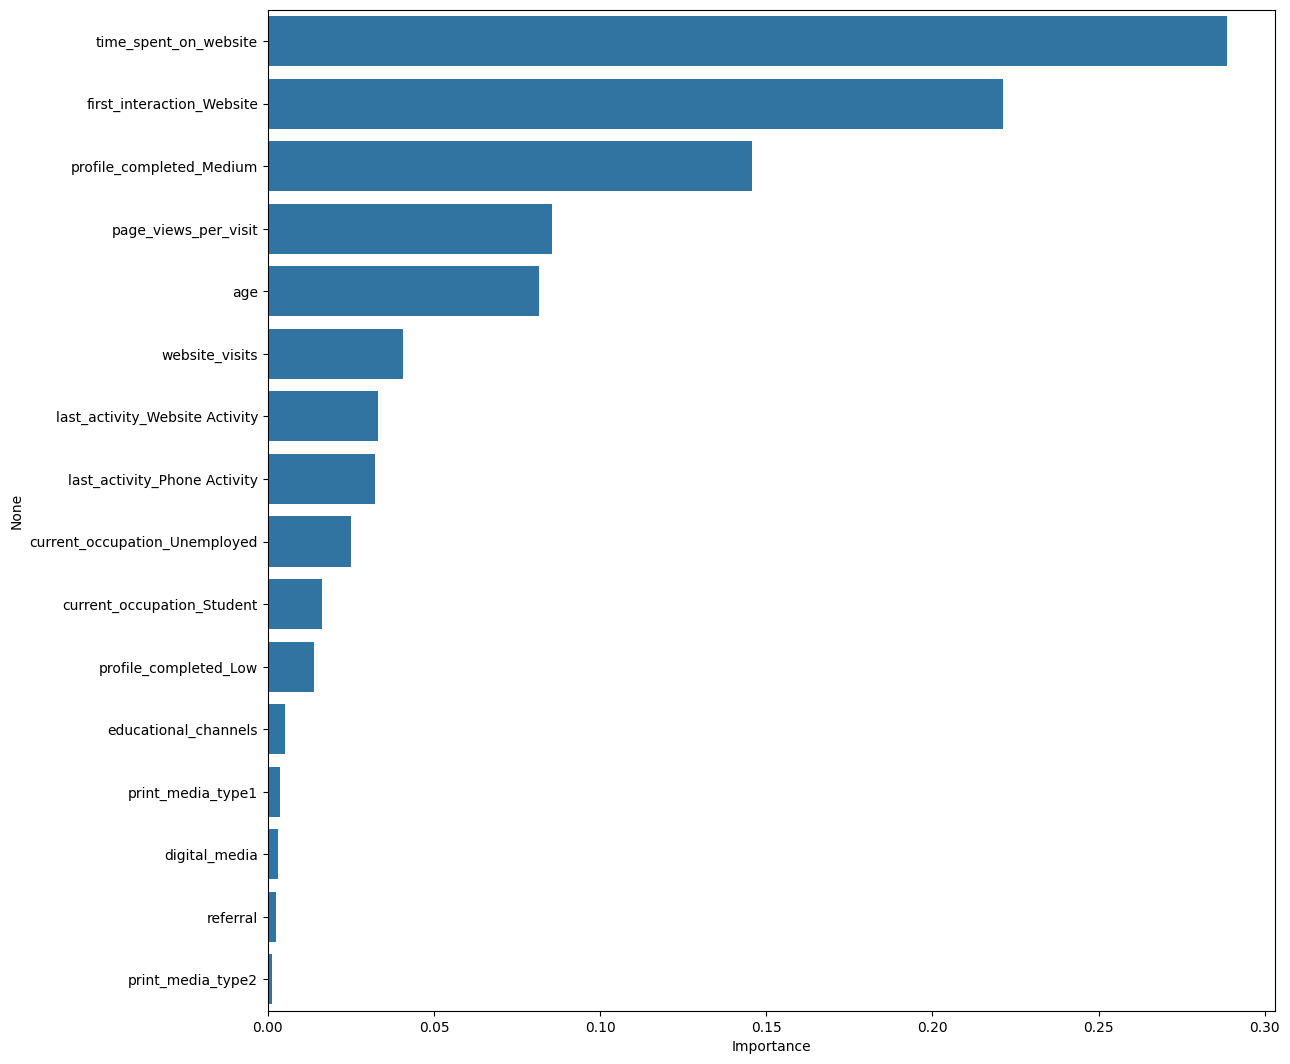

In [ ]:
# Let's plot the feature importance

importances = rf_estimator_tuned.feature_importances_


columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- **The feature importance plot for the tuned random forest model is quite similar to the standard decision tree.** The model seems to suggest that `time_spent_on_website`, `first_interaction_website`, `profile_completed_medium`,`age`, and `page_views_per_visit` are the most important features.

- The first three are in the same order as the decision tree, then "age" and "pages per visit" swap places.

- In comparison to the standard random forest **first interaction website** gains more importance and the layout is more similar to the decision tree than the random forest.

- Other important features are website visits, last activity phone, last activity website and current ocupation unemployed.

## Actionable Insights and Recommendations

## **Conclusions:**

- The different tree models **identifyed the leads which are more likely to convert**.


- Converting lead profile: **around 48 years of age, around 3.5 website visits, around 1068 seconds spent on website, around 3 pages viewed per visit, first interaction was with website, had a high profile completed, is a working professional, it's last activity was with website**


- The best performing model seems to suggest that `time_spent_on_website`, `first_interaction_website`, `profile_completed_medium`,`age`, and `page_views_per_visit` are the most important features.

## **Recomendations**


The main objectives of this research project were to:


- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers;


- Find the factors driving the lead conversion process;


- Create a profile of the leads which are likely to convert.


If you only take this into account, just like explained in the conclusions,


- The converting lead profile is: **around 48 years of age, around 3.5 website visits, around 1068 seconds spent on website, around 3 pages viewed per visit, first interaction was with website, had a high profile completed, is a working professional, it's last activity was with website**


- And the best performing model seems to suggest that `time_spent_on_website`, `first_interaction_website`, `profile_completed_medium`,`age`, and `page_views_per_visit` are the most important features.


However, my opinion is that this doesn't show the full picture of the data and that there's a bigger story in play.


For example, three of the four importance graphs **show last activity phone above last activity website** and the first importance graph from the standard decision tree shows the opposite.


If we look at the stacked bar plots of the relation between status and the other columns we see that last activity website is the option with the highest conversion rate out of the three.


And **last activity email doesn't even show up in none of the importance graphs** and not only does it have a higher conversion rate than last activity phone, but it also is the option with the biggest percentage of potential leads with around 49%.


Also, profile completed medium is shown as one of the most important features, **however it isn't the one with the highest conversion rate with only about 20% in comparison to profile completed high with about 40%.**  


A similar thing happens with the current occupation. The importance graph shows unemployed as the highest importance and doesn't show professional at all. **However, the highest conversion rate of the three is professional with about 35%** in comparison to **about 23% unemployed** and **about 10% student.**


**I think the analysis of which leads are most likely to convert should take into consideration all the different analyses methods showed here and not just take the importance graphs as the only global truth.**


For example, out of all the categorical variables, **referral** is the one with the **highest conversion rate with 70% of leads that had the program refered to converting into paying customers.**

- Like I said previously, there should be an actual referral program with a substantial monetary compensation for a converted referral in order to incentivize the most effective conversion rate.


Regarding the **advertisement** and the target audiences, I don't know if the average age of the leads is 46 because that's just the reality of the market for the program or if it's because of the **poor reach** of the **digital media ads.**


Either way I still think digital media should be the priority, as very few people under 50 consume physical print media, as seen with **89% of leads not seeing newspaper advertisement** and **94% the magazines**. Which isn't surprising given their decrease in popularity.

- And, as previously stated, I don't think there should even be print media advertisement regarding the offer of **programs on cutting-edge technologies** to students and professionals to help them upskill/reskill. All advertising resources should be focused on digital media.

        
- Then, to reiterate, either something is wrong with the advertisement or with the digital platforms used. An overhaul to the actual ads might be necessary given that **84% of leads didn't see the digital media ads.** Which is absolutly appaling.
     
- I would need to analyse the actual ads themselves to reach any futher conclusion, additional investigation is recomended.
     
- Also, platforms like Instagram, X, Youtube and TikTok should be priorityzed.
     
- For example, I saw the ad for this course on Youtube and It was the only place I saw the ad for this course and this platform of different courses.


If you still want to show ads to an older audience outside of digital media like social media platforms, you should display ads on the websites of the newspapers and magazines selected for the print media ads. Specifically anything relating to business, education, tech, finance and management.


- Finally, **The educational channels also seem low with 84% of leads not seeing anything about the program on them.** There could be and increase of discussion on these channels. However, I think there should be an actual partnership with universities, instead of just discussion forums and educational websites.